<a href="https://colab.research.google.com/github/sandra660/fraud_detection_project/blob/Fawzybranch/notebooks/note2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Notebook 2 - Modeling (Group 2)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

plt.style.use("seaborn-v0_8")

# Load cleaned dataset from Notebook 1
prov_df = pd.read_csv('/content/provider_dataset_cleaned_group2.csv')

print("Dataset Loaded:", prov_df.shape)
display(prov_df.head())


Dataset Loaded: (5410, 22)


,Provider,PotentialFraud,ip_total_reimb,ip_total_deduct,ip_num_claims,ip_avg_duration,ip_max_duration,op_total_reimb,op_total_deduct,op_num_claims,...,bene_count,avg_num_chronic,total_reimb,total_deduct,total_claims,reimb_per_claim,deduct_per_claim,ip_to_op_claim_ratio,bene_per_claim,Fraud
0,PRV51001,No,97000.0,5340.0,5.0,5.000000,14.0,7640.0,0.0,20.0,...,24,16.458333,104640.0,5340.0,25.0,4024.615385,205.384615,0.238095,0.923077,0
1,PRV51003,Yes,573000.0,66216.0,62.0,5.161290,27.0,32670.0,70.0,70.0,...,117,17.632479,605670.0,66286.0,132.0,4553.909774,498.390977,0.873239,0.879699,1
2,PRV51004,No,0.0,0.0,0.0,0.000000,0.0,52170.0,310.0,149.0,...,138,17.681159,52170.0,310.0,149.0,347.800000,2.066667,0.000000,0.920000,0
3,PRV51005,Yes,0.0,0.0,0.0,0.000000,0.0,280910.0,3700.0,1165.0,...,495,18.115152,280910.0,3700.0,1165.0,240.917667,3.173242,0.000000,0.424528,1
4,PRV51007,No,19000.0,3204.0,3.0,5.333333,7.0,14710.0,60.0,69.0,...,58,18.120690,33710.0,3264.0,72.0,461.780822,44.712329,0.042857,0.794521,0


In [ ]:
X = prov_df.drop(columns=['Provider', 'PotentialFraud', 'Fraud'])
y = prov_df['Fraud']

print("Full Label Distribution:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=7
)

print("\nTRAIN LABELS:")
print(y_train.value_counts())
print("\nTEST LABELS:")
print(y_test.value_counts())


Full Label Distribution:
Fraud
0    4904
1     506
Name: count, dtype: int64

TRAIN LABELS:
Fraud
0    3923
1     405
Name: count, dtype: int64

TEST LABELS:
Fraud
0    981
1    101
Name: count, dtype: int64


In [ ]:
sm = SMOTE(random_state=7)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE, train label distribution:")
print(y_train_res.value_counts())


After SMOTE, train label distribution:
Fraud
0    3923
1    3923
Name: count, dtype: int64


In [ ]:
scaler_g2 = StandardScaler()
X_train_res_scaled = scaler_g2.fit_transform(X_train_res)
X_test_scaled = scaler_g2.transform(X_test)


In [ ]:
# Logistic Regression
logreg_g2 = LogisticRegression(max_iter=600, solver='lbfgs', random_state=7)
logreg_g2.fit(X_train_res_scaled, y_train_res)

# Random Forest
rf_g2 = RandomForestClassifier(
    n_estimators=240, min_samples_split=4,
    min_samples_leaf=2, random_state=7, n_jobs=-1
)
rf_g2.fit(X_train_res, y_train_res)

# Gradient Boosting
gb_g2 = GradientBoostingClassifier(
    n_estimators=180, learning_rate=0.08,
    max_depth=3, random_state=7
)
gb_g2.fit(X_train_res, y_train_res)

print("Models successfully trained.")


Models successfully trained.


In [ ]:
os.makedirs("/content/model_outputs_group2", exist_ok=True)

models = {
    "logreg": ("scaled", logreg_g2),
    "rf": ("raw", rf_g2),
    "gb": ("raw", gb_g2)
}

for name, (input_type, model) in models.items():
    print("\n==============================")
    print("RESULTS FOR:", name.upper())
    print("==============================")

    # Use scaled or raw inputs
    X_in = X_test_scaled if input_type == "scaled" else X_test

    y_pred = model.predict(X_in)

    # Classification report
    report = classification_report(y_test, y_pred)
    print(report)

    with open(f"/content/model_outputs_group2/{name}_classification_report.txt", "w") as f:
        f.write(report)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Save confusion matrix
    cm_df = pd.DataFrame(cm, columns=["Pred 0", "Pred 1"], index=["Actual 0", "Actual 1"])
    cm_df.to_csv(f"/content/model_outputs_group2/{name}_confusion_matrix.csv")




RESULTS FOR: LOGREG
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       981
           1       0.51      0.91      0.65       101

    accuracy                           0.91      1082
   macro avg       0.75      0.91      0.80      1082
weighted avg       0.95      0.91      0.92      1082

Confusion Matrix:
 [[893  88]
 [  9  92]]

RESULTS FOR: RF
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       981
           1       0.57      0.84      0.68       101

    accuracy                           0.93      1082
   macro avg       0.77      0.89      0.82      1082
weighted avg       0.94      0.93      0.93      1082

Confusion Matrix:
 [[916  65]
 [ 16  85]]

RESULTS FOR: GB
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       981
           1       0.52      0.90      0.66       101

    accuracy                           0.91

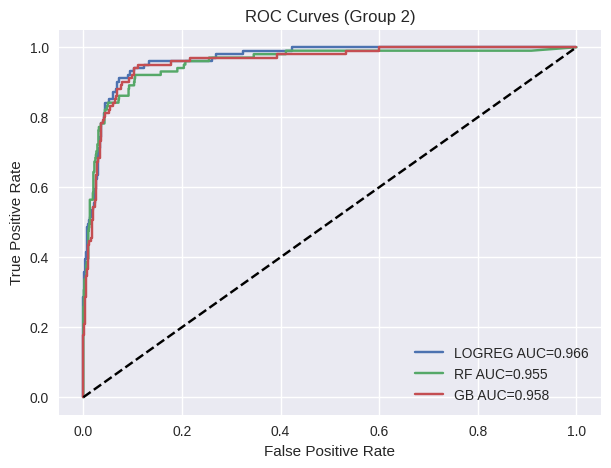

In [ ]:
plt.figure(figsize=(7,5))

for name, (input_type, model) in models.items():
    X_in = X_test_scaled if input_type == "scaled" else X_test
    y_prob = model.predict_proba(X_in)[:,1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name.upper()} AUC={roc_auc:.3f}")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves (Group 2)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.savefig("/content/model_outputs_group2/ROC_curves_group2.png")
plt.show()


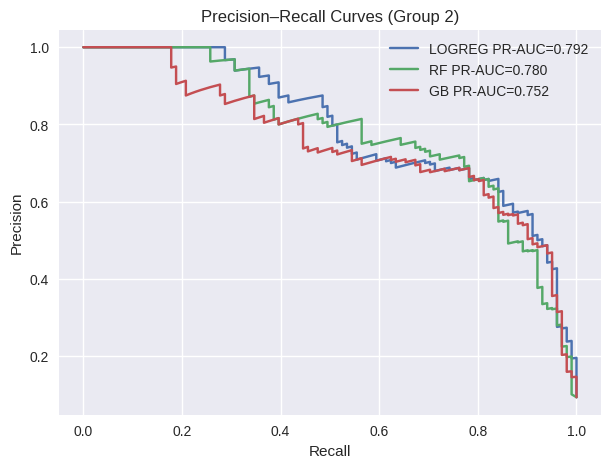

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(7,5))

for name, (input_type, model) in models.items():
    X_in = X_test_scaled if input_type == "scaled" else X_test
    y_prob = model.predict_proba(X_in)[:,1]

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f"{name.upper()} PR-AUC={pr_auc:.3f}")

plt.title("Precision–Recall Curves (Group 2)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)

plt.savefig("/content/model_outputs_group2/PR_curves_group2.png")
plt.show()


In [ ]:
joblib.dump(logreg_g2, '/content/model_outputs_group2/logreg_model_group2.pkl')
joblib.dump(rf_g2, '/content/model_outputs_group2/rf_model_group2.pkl')
joblib.dump(gb_g2, '/content/model_outputs_group2/gb_model_group2.pkl')
joblib.dump(scaler_g2, '/content/model_outputs_group2/scaler_group2.pkl')

np.save('/content/model_outputs_group2/X_test_group2.npy', X_test.values)
np.save('/content/model_outputs_group2/y_test_group2.npy', y_test.values)

print("All models, scaler, metrics, and plots saved in: /content/model_outputs_group2/")


All models, scaler, metrics, and plots saved in: /content/model_outputs_group2/


In [ ]:
import json

# Load cleaned dataset if not already loaded
df = pd.read_csv("/content/provider_dataset_cleaned_group2.csv")

# Drop provider + labels to get only feature columns
feature_names = list(df.drop(columns=['Provider', 'PotentialFraud', 'Fraud']).columns)

# Save feature names
with open("/content/model_outputs_group2/feature_names_group2.json", "w") as f:
    json.dump(feature_names, f)

print("✓ Feature names saved successfully!")
print("Number of features:", len(feature_names))
print(feature_names[:10], "...")  # preview


✓ Feature names saved successfully!
Number of features: 19
['ip_total_reimb', 'ip_total_deduct', 'ip_num_claims', 'ip_avg_duration', 'ip_max_duration', 'op_total_reimb', 'op_total_deduct', 'op_num_claims', 'op_avg_duration', 'op_max_duration'] ...
